# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

arquivo = pd.read_csv('SINASC_RO_2019.csv')
df = pd.DataFrame(arquivo)

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [24]:
df.loc[df['APGAR5']<4, 'Nivel Asfixia'] = 'Asfixia Grave'
df.loc[(df['APGAR5']>3) & (df['APGAR5']<6), 'Nivel Asfixia'] = 'Asfixia Moderada'
df.loc[(df['APGAR5']>5) & (df['APGAR5']<8), 'Nivel Asfixia'] = 'Asfixia Leve'
df.loc[(df['APGAR5']>7) & (df['APGAR5']<11), 'Nivel Asfixia'] = 'Normal'
df[df['APGAR5']==2].head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,Nivel Asfixia
1095,1,NaN,110002,3,24,1.0,4 a 7 anos,999992.0,3.0,0.0,...,1102,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571,Asfixia Grave
6482,1,4001303.0,110020,1,25,2.0,8 a 11 anos,999992.0,1.0,0.0,...,6525,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,Asfixia Grave


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [26]:
list(df.columns)

['ORIGEM',
 'CODESTAB',
 'CODMUNNASC',
 'LOCNASC',
 'IDADEMAE',
 'ESTCIVMAE',
 'ESCMAE',
 'CODOCUPMAE',
 'QTDFILVIVO',
 'QTDFILMORT',
 'CODMUNRES',
 'GESTACAO',
 'GRAVIDEZ',
 'PARTO',
 'CONSULTAS',
 'DTNASC',
 'HORANASC',
 'SEXO',
 'APGAR1',
 'APGAR5',
 'RACACOR',
 'PESO',
 'IDANOMAL',
 'DTCADASTRO',
 'CODANOMAL',
 'NUMEROLOTE',
 'VERSAOSIST',
 'DTRECEBIM',
 'DIFDATA',
 'DTRECORIGA',
 'NATURALMAE',
 'CODMUNNATU',
 'CODUFNATU',
 'ESCMAE2010',
 'SERIESCMAE',
 'DTNASCMAE',
 'RACACORMAE',
 'QTDGESTANT',
 'QTDPARTNOR',
 'QTDPARTCES',
 'IDADEPAI',
 'DTULTMENST',
 'SEMAGESTAC',
 'TPMETESTIM',
 'CONSPRENAT',
 'MESPRENAT',
 'TPAPRESENT',
 'STTRABPART',
 'STCESPARTO',
 'TPNASCASSI',
 'TPFUNCRESP',
 'TPDOCRESP',
 'DTDECLARAC',
 'ESCMAEAGR1',
 'STDNEPIDEM',
 'STDNNOVA',
 'CODPAISRES',
 'TPROBSON',
 'PARIDADE',
 'KOTELCHUCK',
 'CONTADOR',
 'munResStatus',
 'munResTipo',
 'munResNome',
 'munResUf',
 'munResLat',
 'munResLon',
 'munResAlt',
 'munResArea',
 'Nivel Asfixia']

<Axes: xlabel='SEXO', ylabel='APGAR5'>

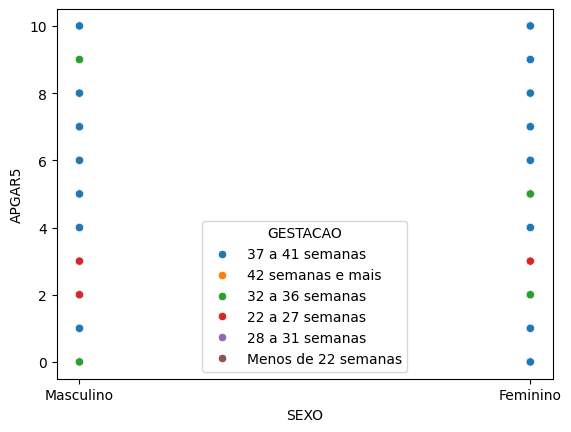

In [34]:
sns.scatterplot(x='SEXO', y='APGAR5', hue='GESTACAO', data=df)

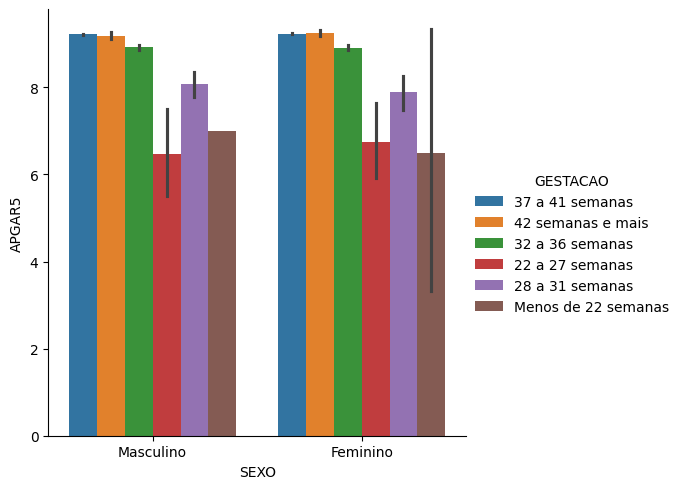

In [48]:
sns.catplot(x='SEXO', y='APGAR5', hue='GESTACAO',kind = 'bar', data=df)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [50]:
tabela_cruzada = pd.crosstab(df['APGAR5'], df['GESTACAO'])

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,5,1,1
1.0,0,0,2,20,0,0
2.0,8,2,2,3,0,1
3.0,6,1,2,5,0,0
4.0,1,5,8,7,0,0
5.0,0,7,11,21,1,0
6.0,2,7,17,45,1,0
7.0,10,11,56,151,5,1
8.0,24,61,362,1417,44,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [58]:
tabela_cruzada = pd.crosstab(df['APGAR5'], df['GESTACAO'])
tabela_cruzada.sum(axis=1)

APGAR5
0.0        16
1.0        22
2.0        16
3.0        14
4.0        21
5.0        40
6.0        72
7.0       234
8.0      1908
9.0     15372
10.0     7994
dtype: int64

In [66]:
freq_apgar5 = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)
freq_apgar5

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,0.437500,0.000000,0.125000,0.312500,0.062500,0.062500
1.0,0.000000,0.000000,0.090909,0.909091,0.000000,0.000000
2.0,0.500000,0.125000,0.125000,0.187500,0.000000,0.062500
3.0,0.428571,0.071429,0.142857,0.357143,0.000000,0.000000
4.0,0.047619,0.238095,0.380952,0.333333,0.000000,0.000000
5.0,0.000000,0.175000,0.275000,0.525000,0.025000,0.000000
6.0,0.027778,0.097222,0.236111,0.625000,0.013889,0.000000
7.0,0.042735,0.047009,0.239316,0.645299,0.021368,0.004274
8.0,0.012579,0.031971,0.189727,0.742662,0.023061,0.000000


In [72]:
freq_apgar5.sum(axis=1)

APGAR5
0.0     1.0
1.0     1.0
2.0     1.0
3.0     1.0
4.0     1.0
5.0     1.0
6.0     1.0
7.0     1.0
8.0     1.0
9.0     1.0
10.0    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='APGAR5'>

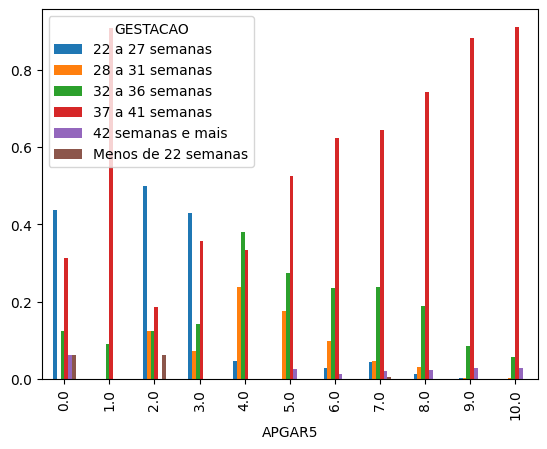

In [74]:
freq_apgar5.plot.bar()

<Axes: xlabel='APGAR5'>

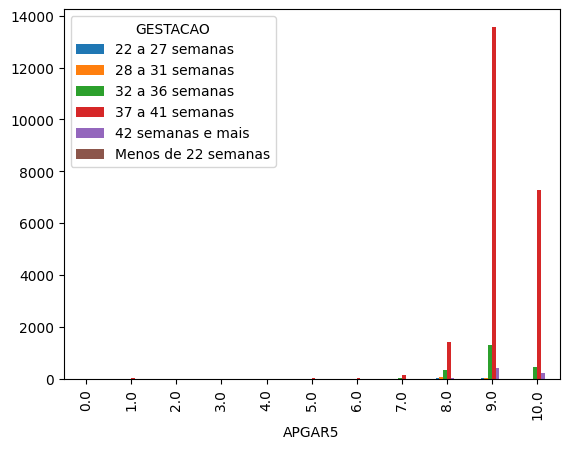

In [76]:
tabela_cruzada.plot.bar()

In [ ]:
#O primeio gráfico colabora parcialmente, pois o APGAR5 igual a 1 se tem que a maioria dos casos ocorreu com crianças que nasceram após 37 semanas.
#Entretanto, os gráficos também mostram uma elevação dos casos de asfixia quando o bebê nasce antes de 37 semanas, principalmente entre 22-27 semanas

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

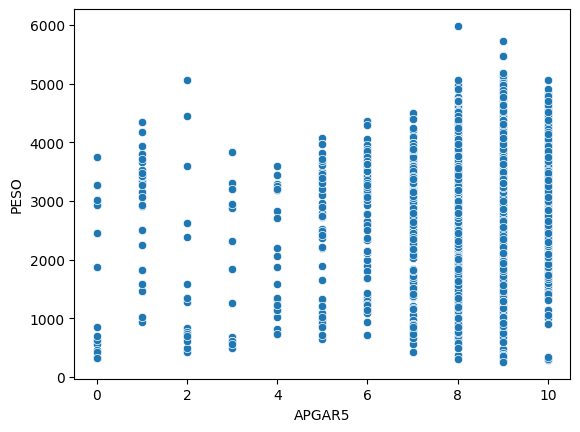

In [78]:
sns.displot(x='PESO', hue= 'APGAR5', data=df, bins=20, element='step' )

<Axes: xlabel='APGAR5', ylabel='PESO'>

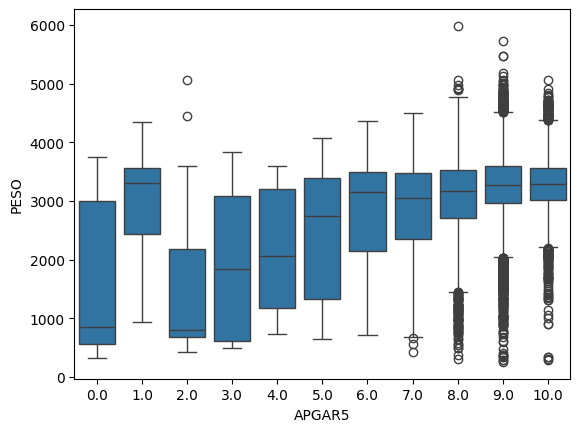

In [97]:
sns.boxplot(data=df, y = 'PESO', x = 'APGAR5', orient='v')

In [ ]:
#No primeiro gráfico a visualização não ficou tão boa, mas no segundo é possível verificar que bebês com peso baixo tendem a ter problemas com asfixia